In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import datetime
from scipy import stats

In [2]:
path = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\\'

In [3]:
# GOES-16 timeseries filepaths

pixelA_g16_lst = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelA_g16_rad = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_07-14_R.csv')

pixelB_g16_lst = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelB_g16_rad = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_07-14_R.csv')

pixelC_g16_rad = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_07-14_R.csv')
pixelC_g16_lst = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_01-15_LST.csv')

pixelD_g16_lst = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelD_g16_rad = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_07-14_R.csv')

pixelE_g16_lst = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelE_g16_rad = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_07-14_R.csv')

pixelNW_g16_lst = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelNW_g16_rad = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_07-14_R.csv')

# GOES-17 timeseries filepaths

pixelA_g17_lst = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelA_g17_rad = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_R.csv')

pixelB_g17_lst = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelB_g17_rad = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC1_g17_lst = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelC1_g17_rad = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC2_g17_rad = pd.read_csv(path + 'pixelC2_GOES-17_ABI_02_01-15_R.csv')
pixelC2_g17_lst = pd.read_csv(path + 'pixelC2_GOES-17_ABI_2020_02_01-15_LST.csv')

pixelD_g17_lst = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelD_g17_rad = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_R.csv')

pixelE_g17_lst = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelE_g17_rad = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_R.csv')

pixelNW_g17_lst = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelNW_g17_rad = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_R.csv')

In [4]:
df_list = [pixelA_g16_lst ,pixelA_g16_rad,pixelB_g16_lst,pixelB_g16_rad,pixelC_g16_rad,pixelC_g16_lst,pixelD_g16_lst,pixelD_g16_rad,pixelE_g16_lst,pixelE_g16_rad,pixelNW_g16_lst,pixelNW_g16_rad,pixelA_g17_lst,pixelA_g17_rad,pixelB_g17_lst,pixelB_g17_rad,pixelC1_g17_lst,pixelC1_g17_rad,pixelC2_g17_rad,pixelC2_g17_lst,pixelD_g17_lst,pixelD_g17_rad,pixelE_g17_lst,pixelE_g17_rad,pixelNW_g17_lst,pixelNW_g17_rad]

for df in df_list:
    if 't' in df.columns:
        df['datetime'] = pd.to_datetime(df.t)
    elif 'time' in df.columns:
        df['datetime'] = pd.to_datetime(df.time)
    df.set_index('datetime', inplace=True)

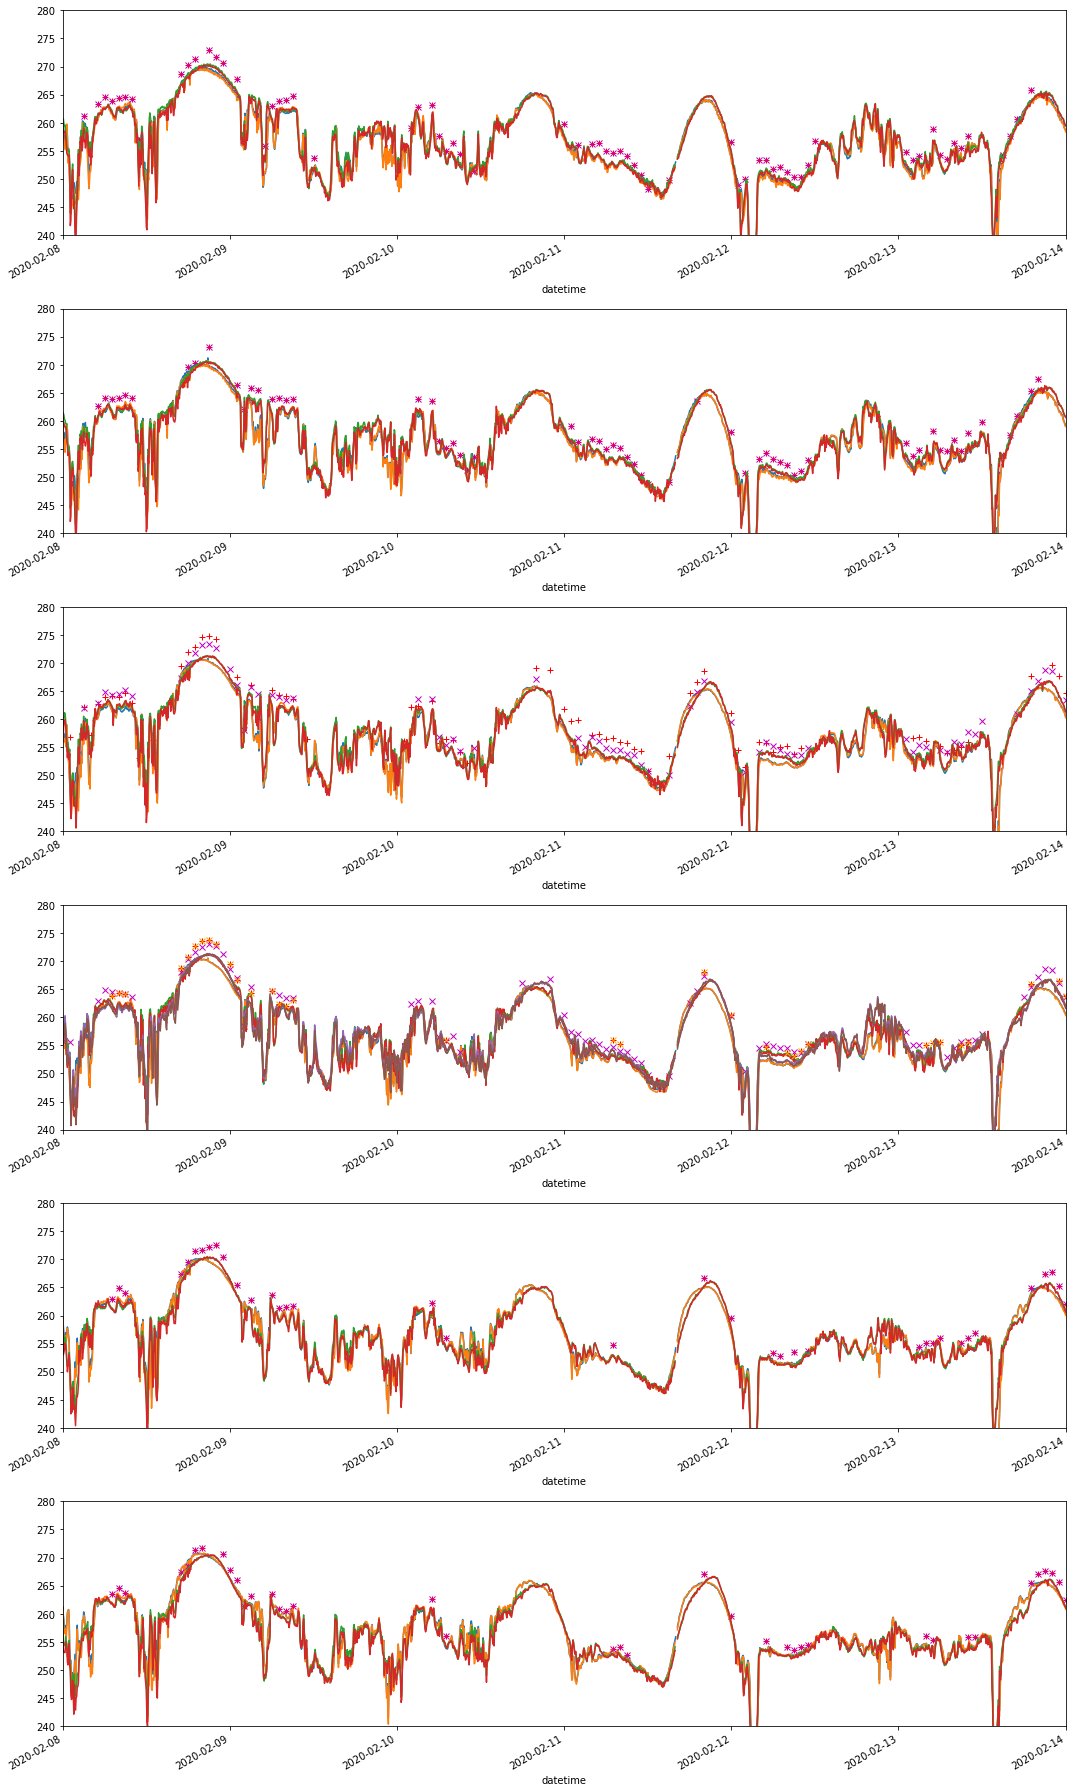

In [5]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(15,25), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16
pixelNW_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axNW)
pixelNW_g16_rad.b13_tb_2km.plot(ax=axNW)
pixelNW_g16_rad.b14_tb_2km.plot(ax=axNW)

# GOES-17
pixelNW_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axNW)
pixelNW_g17_rad.b13_tb_2km.plot(ax=axNW)
pixelNW_g17_rad.b14_tb_2km.plot(ax=axNW)

### Pixel A

# GOES-16
pixelA_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axA)
pixelA_g16_rad.b13_tb_2km.plot(ax=axA)
pixelA_g16_rad.b14_tb_2km.plot(ax=axA)

# GOES-17
pixelA_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axA)
pixelA_g17_rad.b13_tb_2km.plot(ax=axA)
pixelA_g17_rad.b14_tb_2km.plot(ax=axA)

### Pixel B

# GOES-16
pixelB_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axB)
pixelB_g16_rad.b13_tb_2km.plot(ax=axB)
pixelB_g16_rad.b14_tb_2km.plot(ax=axB)

# GOES-17
pixelB_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axB)
pixelB_g17_rad.b13_tb_2km.plot(ax=axB)
pixelB_g17_rad.b14_tb_2km.plot(ax=axB)

### Pixel C

# GOES-16
pixelC_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axC)
pixelC_g16_rad.b13_tb_2km.plot(ax=axC)
pixelC_g16_rad.b14_tb_2km.plot(ax=axC)

# GOES-17
pixelC1_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axC)
pixelC1_g17_rad.b13_tb_2km.plot(ax=axC)
pixelC1_g17_rad.b14_tb_2km.plot(ax=axC)

pixelC2_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='orange', ax=axC)
pixelC2_g17_rad.b13_tb_2km.plot(ax=axC)
pixelC2_g17_rad.b14_tb_2km.plot(ax=axC)

### Pixel D

# GOES-16
pixelD_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axD)
pixelD_g16_rad.b13_tb_2km.plot(ax=axD)
pixelD_g16_rad.b14_tb_2km.plot(ax=axD)

# GOES-17
pixelD_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axD)
pixelD_g17_rad.b13_tb_2km.plot(ax=axD)
pixelD_g17_rad.b14_tb_2km.plot(ax=axD)

### Pixel E

# GOES-16
pixelE_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axE)
pixelE_g16_rad.b13_tb_2km.plot(ax=axE)
pixelE_g16_rad.b14_tb_2km.plot(ax=axE)

# GOES-17
pixelE_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axE)
pixelE_g17_rad.b13_tb_2km.plot(ax=axE)
pixelE_g17_rad.b14_tb_2km.plot(ax=axE)

# formatting
for this_ax in axs.ravel():
    this_ax.set_xlim(pd.Timestamp('2020-02-08'), pd.Timestamp('2020-02-14'))
    this_ax.set_ylim(240,280)

---

Read in airborne IR data for each GOES pixel for flights on Feb 8, and 11, 2020

In [6]:
airborneIR_g16_feb08 = pd.read_csv(path + 'airborne_ir\g16_SNOWEX2020_IR_PLANE_2020Feb08_mosaicked_2020-02-08.csv')
airborneIR_g17_feb08 = pd.read_csv(path + 'airborne_ir\g17_SNOWEX2020_IR_PLANE_2020Feb08_mosaicked_2020-02-08.csv')

airborneIR_g16_feb11 = pd.read_csv(path + 'airborne_ir\g16_SNOWEX2020_IR_PLANE_2020Feb11_mosaicked_2020-02-11.csv')
airborneIR_g17_feb11 = pd.read_csv(path + 'airborne_ir\g17_SNOWEX2020_IR_PLANE_2020Feb11_mosaicked_2020-02-11.csv')

In [7]:
df_list = [airborneIR_g16_feb08, airborneIR_g17_feb08, airborneIR_g16_feb11, airborneIR_g17_feb11]
for df in df_list:
    df['datetime'] = pd.to_datetime(df.timestampUTC)
    df.set_index('datetime', inplace=True)
    for colname in ['tb_mean', 'tb_max', 'tb_min']:
        df[f'{colname}_K'] = df[f'{colname}'] + 273.15

In [8]:
# filter out data with n pixels < some % of max pixels we'd expect
# for GOES-16 max pixels seems to be 326626 ~ 330000
# and for GOES-17 258703 ~ 260000
fraction_area = 1/3 # example: if set to 0.5, we need at least half of the pixel to not discard the values
g16_min_pixels = 330000 * fraction_area
g17_min_pixels = 260000 * fraction_area


# GOES-16 Feb 8th
pixelNW_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="NW") & (airborneIR_g16_feb08.n >= g16_min_pixels)]
pixelA_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="A") & (airborneIR_g16_feb08.n >= g16_min_pixels)]
pixelB_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="B") & (airborneIR_g16_feb08.n >= g16_min_pixels)]
pixelC_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="C") & (airborneIR_g16_feb08.n >= g16_min_pixels)]
pixelD_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="D") & (airborneIR_g16_feb08.n >= g16_min_pixels)]
pixelE_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="E") & (airborneIR_g16_feb08.n >= g16_min_pixels)]

# GOES-16 Feb 11th
pixelNW_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="NW") & (airborneIR_g16_feb11.n >= g16_min_pixels)]
pixelA_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="A") & (airborneIR_g16_feb11.n >= g16_min_pixels)]
pixelB_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="B") & (airborneIR_g16_feb11.n >= g16_min_pixels)]
pixelC_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="C") & (airborneIR_g16_feb11.n >= g16_min_pixels)]
pixelD_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="D") & (airborneIR_g16_feb11.n >= g16_min_pixels)]
pixelE_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="E") & (airborneIR_g16_feb11.n >= g16_min_pixels)]


# GOES-17 Feb 8th
pixelNW_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="NW") & (airborneIR_g17_feb08.n >= g17_min_pixels)]
pixelA_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="A") & (airborneIR_g17_feb08.n >= g17_min_pixels)]
pixelB_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="B") & (airborneIR_g17_feb08.n >= g17_min_pixels)]
pixelC1_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="C1") & (airborneIR_g17_feb08.n >= g17_min_pixels)]
pixelC2_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="C2") & (airborneIR_g17_feb08.n >= g17_min_pixels)]
pixelD_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="D") & (airborneIR_g17_feb08.n >= g17_min_pixels)]
pixelE_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="E") & (airborneIR_g17_feb08.n >= g17_min_pixels)]

# GOES-17 Feb 11th
pixelNW_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="NW") & (airborneIR_g17_feb11.n >= g17_min_pixels)]
pixelA_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="A") & (airborneIR_g17_feb11.n >= g17_min_pixels)]
pixelB_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="B") & (airborneIR_g17_feb11.n >= g17_min_pixels)]
pixelC1_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="C1") & (airborneIR_g17_feb11.n >= g17_min_pixels)]
pixelC2_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="C2") & (airborneIR_g17_feb11.n >= g17_min_pixels)]
pixelD_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="D") & (airborneIR_g17_feb11.n >= g17_min_pixels)]
pixelE_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="E") & (airborneIR_g17_feb11.n >= g17_min_pixels)]

<AxesSubplot:xlabel='datetime'>

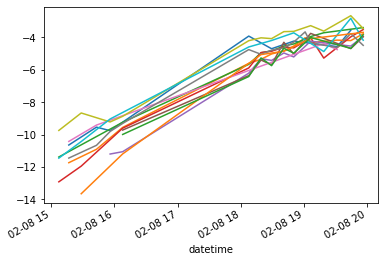

In [9]:

pixelNW_airborneIR_g16_feb08.tb_mean.plot()
pixelA_airborneIR_g16_feb08.tb_mean.plot() 
pixelB_airborneIR_g16_feb08.tb_mean.plot() 
pixelC_airborneIR_g16_feb08.tb_mean.plot() 
pixelD_airborneIR_g16_feb08.tb_mean.plot() 
pixelE_airborneIR_g16_feb08.tb_mean.plot() 

#pixelNW_airborneIR_g16_feb11.tb_mean.plot()
#pixelA_airborneIR_g16_feb11.tb_mean.plot()
#pixelB_airborneIR_g16_feb11.tb_mean.plot()
#pixelC_airborneIR_g16_feb11.tb_mean.plot()
#pixelD_airborneIR_g16_feb11.tb_mean.plot()
#pixelE_airborneIR_g16_feb11.tb_mean.plot()

pixelNW_airborneIR_g17_feb08.tb_mean.plot()
pixelA_airborneIR_g17_feb08.tb_mean.plot() 
pixelB_airborneIR_g17_feb08.tb_mean.plot() 
pixelC1_airborneIR_g17_feb08.tb_mean.plot()
pixelC2_airborneIR_g17_feb08.tb_mean.plot()
pixelD_airborneIR_g17_feb08.tb_mean.plot() 
pixelE_airborneIR_g17_feb08.tb_mean.plot() 

#pixelNW_airborneIR_g17_feb11.tb_mean.plot()
#pixelA_airborneIR_g17_feb11.tb_mean.plot() 
#pixelB_airborneIR_g17_feb11.tb_mean.plot() 
#pixelC1_airborneIR_g17_feb11.tb_mean.plot()
#pixelC2_airborneIR_g17_feb11.tb_mean.plot()
#pixelD_airborneIR_g17_feb11.tb_mean.plot() 
#pixelE_airborneIR_g17_feb11.tb_mean.plot() 

<AxesSubplot:xlabel='datetime'>

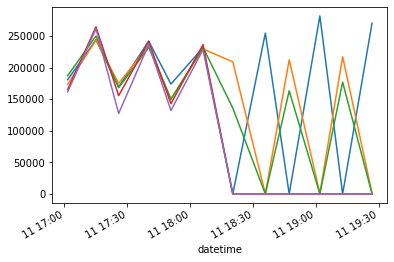

In [10]:
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="A"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="B"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="C"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="D"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="E"].n.plot()

---
Plot all together on same graph

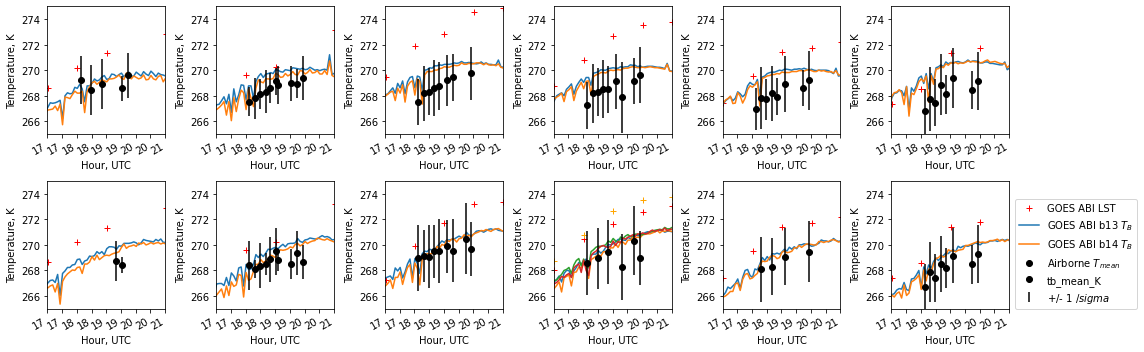

In [11]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(16,5), tight_layout=True)

[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()

### Pixel NW

# GOES-16
pixelNW_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axNW16, label='GOES-16 LST')
pixelNW_g16_rad.b13_tb_2km.plot(ax=axNW16, label='GOES-16 b13 $T_B$')
pixelNW_g16_rad.b14_tb_2km.plot(ax=axNW16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelNW_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW16, label='Airborne $T_{mean}$')
axNW16.errorbar(pixelNW_airborneIR_g16_feb08.index, pixelNW_airborneIR_g16_feb08.tb_mean_K, yerr=pixelNW_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelNW_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW16, label='Airborne $T_{mean}$')
axNW16.errorbar(pixelNW_airborneIR_g16_feb11.index, pixelNW_airborneIR_g16_feb11.tb_mean_K, yerr=pixelNW_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')

# GOES-17
pixelNW_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axNW17, label='GOES-17 LST')
pixelNW_g17_rad.b13_tb_2km.plot(ax=axNW17, label='GOES-17 b13 $T_B$')
pixelNW_g17_rad.b14_tb_2km.plot(ax=axNW17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelNW_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW17, label='Airborne $T_{mean}$')
axNW17.errorbar(pixelNW_airborneIR_g17_feb08.index, pixelNW_airborneIR_g17_feb08.tb_mean_K, yerr=pixelNW_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelNW_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW17, label='Airborne $T_{mean}$')
axNW17.errorbar(pixelNW_airborneIR_g17_feb11.index, pixelNW_airborneIR_g17_feb11.tb_mean_K, yerr=pixelNW_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel A

# GOES-16
pixelA_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axA16, label='GOES-16 LST')
pixelA_g16_rad.b13_tb_2km.plot(ax=axA16, label='GOES-16 b13 $T_B$')
pixelA_g16_rad.b14_tb_2km.plot(ax=axA16, label='GOES-16 b14 $T_B$')


# Airborne Feb 8th
pixelA_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA16, label='Airborne $T_{mean}$')
axA16.errorbar(pixelA_airborneIR_g16_feb08.index, pixelA_airborneIR_g16_feb08.tb_mean_K, yerr=pixelA_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelA_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA16, label='Airborne $T_{mean}$')
axA16.errorbar(pixelA_airborneIR_g16_feb11.index, pixelA_airborneIR_g16_feb11.tb_mean_K, yerr=pixelA_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
pixelA_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axA17, label='GOES-17 LST')
pixelA_g17_rad.b13_tb_2km.plot(ax=axA17, label='GOES-17 b13 $T_B$')
pixelA_g17_rad.b14_tb_2km.plot(ax=axA17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelA_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA17, label='Airborne $T_{mean}$')
axA17.errorbar(pixelA_airborneIR_g17_feb08.index, pixelA_airborneIR_g17_feb08.tb_mean_K, yerr=pixelA_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelA_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA17, label='Airborne $T_{mean}$')
axA17.errorbar(pixelA_airborneIR_g17_feb11.index, pixelA_airborneIR_g17_feb11.tb_mean_K, yerr=pixelA_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel B

# GOES-16
pixelB_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axB16, label='GOES-16 LST')
pixelB_g16_rad.b13_tb_2km.plot(ax=axB16, label='GOES-16 b13 $T_B$')
pixelB_g16_rad.b14_tb_2km.plot(ax=axB16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelB_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB16, label='Airborne $T_{mean}$')
axB16.errorbar(pixelB_airborneIR_g16_feb08.index, pixelB_airborneIR_g16_feb08.tb_mean_K, yerr=pixelB_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelB_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB16, label='Airborne $T_{mean}$')
axB16.errorbar(pixelB_airborneIR_g16_feb11.index, pixelB_airborneIR_g16_feb11.tb_mean_K, yerr=pixelB_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
pixelB_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axB17, label='GOES-17 LST')
pixelB_g17_rad.b13_tb_2km.plot(ax=axB17, label='GOES-17 b13 $T_B$')
pixelB_g17_rad.b14_tb_2km.plot(ax=axB17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelB_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB17, label='Airborne $T_{mean}$')
axB17.errorbar(pixelB_airborneIR_g17_feb08.index, pixelB_airborneIR_g17_feb08.tb_mean_K, yerr=pixelB_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelB_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB17, label='Airborne $T_{mean}$')
axB17.errorbar(pixelB_airborneIR_g17_feb11.index, pixelB_airborneIR_g17_feb11.tb_mean_K, yerr=pixelB_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel C

# GOES-16
pixelC_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axC16, label='GOES-16 LST')
pixelC_g16_rad.b13_tb_2km.plot(ax=axC16, label='GOES-16 b13 $T_B$')
pixelC_g16_rad.b14_tb_2km.plot(ax=axC16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelC_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC16, label='Airborne $T_{mean}$')
axC16.errorbar(pixelC_airborneIR_g16_feb08.index, pixelC_airborneIR_g16_feb08.tb_mean_K, yerr=pixelC_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelC_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC16, label='Airborne $T_{mean}$')
axC16.errorbar(pixelC_airborneIR_g16_feb11.index, pixelC_airborneIR_g16_feb11.tb_mean_K, yerr=pixelC_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
#C1
pixelC1_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axC17, label='GOES-17 LST')
pixelC1_g17_rad.b13_tb_2km.plot(ax=axC17, label='GOES-17 b13 $T_B$ (1)')
pixelC1_g17_rad.b14_tb_2km.plot(ax=axC17, label='GOES-17 b14 $T_B$ (1)')
#C2
pixelC2_g17_lst.LST.plot(marker = '+', linestyle='none',  color='orange', ax=axC17, label='GOES-17 LST')
pixelC2_g17_rad.b13_tb_2km.plot(ax=axC17, label='GOES-17 b13 $T_B$ (2)')
pixelC2_g17_rad.b14_tb_2km.plot(ax=axC17, label='GOES-17 b14 $T_B$ (2)')

# Airborne Feb 8th
pixelC1_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC1_airborneIR_g17_feb08.index, pixelC1_airborneIR_g17_feb08.tb_mean_K, yerr=pixelC1_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
pixelC2_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC2_airborneIR_g17_feb08.index, pixelC2_airborneIR_g17_feb08.tb_mean_K, yerr=pixelC2_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelC1_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC1_airborneIR_g17_feb11.index, pixelC1_airborneIR_g17_feb11.tb_mean_K, yerr=pixelC1_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
pixelC2_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC2_airborneIR_g17_feb11.index, pixelC2_airborneIR_g17_feb11.tb_mean_K, yerr=pixelC2_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel D

# GOES-16
pixelD_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axD16, label='GOES-16 LST')
pixelD_g16_rad.b13_tb_2km.plot(ax=axD16, label='GOES-16 b13 $T_B$')
pixelD_g16_rad.b14_tb_2km.plot(ax=axD16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelD_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD16, label='Airborne $T_{mean}$')
axD16.errorbar(pixelD_airborneIR_g16_feb08.index, pixelD_airborneIR_g16_feb08.tb_mean_K, yerr=pixelD_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelD_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD16, label='Airborne $T_{mean}$')
axD16.errorbar(pixelD_airborneIR_g16_feb11.index, pixelD_airborneIR_g16_feb11.tb_mean_K, yerr=pixelD_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
pixelD_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axD17, label='GOES-17 LST')
pixelD_g17_rad.b13_tb_2km.plot(ax=axD17, label='GOES-17 b13 $T_B$')
pixelD_g17_rad.b14_tb_2km.plot(ax=axD17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelD_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD17, label='Airborne $T_{mean}$')
axD17.errorbar(pixelD_airborneIR_g17_feb08.index, pixelD_airborneIR_g17_feb08.tb_mean_K, yerr=pixelD_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelD_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD17, label='Airborne $T_{mean}$')
axD17.errorbar(pixelD_airborneIR_g17_feb11.index, pixelD_airborneIR_g17_feb11.tb_mean_K, yerr=pixelD_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel E

# GOES-16
pixelE_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axE16, label='GOES-16 LST')
pixelE_g16_rad.b13_tb_2km.plot(ax=axE16, label='GOES-16 b13 $T_B$')
pixelE_g16_rad.b14_tb_2km.plot(ax=axE16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelE_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE16, label='Airborne $T_{mean}$')
axE16.errorbar(pixelE_airborneIR_g16_feb08.index, pixelE_airborneIR_g16_feb08.tb_mean_K, yerr=pixelE_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelE_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE16, label='Airborne $T_{mean}$')
axE16.errorbar(pixelE_airborneIR_g16_feb11.index, pixelE_airborneIR_g16_feb11.tb_mean_K, yerr=pixelE_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')



# GOES-17
pixelE_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axE17, label='GOES ABI LST')
pixelE_g17_rad.b13_tb_2km.plot(ax=axE17, label='GOES ABI b13 $T_B$')
pixelE_g17_rad.b14_tb_2km.plot(ax=axE17, label='GOES ABI b14 $T_B$')

# Airborne Feb 8th
pixelE_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE17, label='Airborne $T_{mean}$')
axE17.errorbar(pixelE_airborneIR_g17_feb08.index, pixelE_airborneIR_g17_feb08.tb_mean_K, yerr=pixelE_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelE_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE17)
axE17.errorbar(pixelE_airborneIR_g17_feb11.index, pixelE_airborneIR_g17_feb11.tb_mean_K, yerr=pixelE_airborneIR_g17_feb11.tb_std, color='k', linestyle='none')

axE17.legend(loc=(1.05,0))

# plot formatting
for this_ax in axs.ravel():
    
    this_ax.set_ylim(265,275)
    this_ax.set_ylabel('Temperature, K')
    
    this_ax.set_xlim(pd.Timestamp('2020-02-08 17'), pd.Timestamp('2020-02-08 21'))
    date_form = DateFormatter("%H")
    this_ax.xaxis.set_major_formatter(date_form)
    this_ax.set_xlabel('Hour, UTC')


---

Compare the mean brightness temperature and LST from GOES for a time window around each airborne IR observation with the values from that airborne IR observation

In [12]:
def get_time_window_stats(df, variable_name, times, plus_minus_minutes):
    
    mean_values = []
    std_values = []

    for i, t in enumerate(times):
        window_start_time = pd.to_datetime(t) - datetime.timedelta(minutes=plus_minus_minutes)
        window_end_time = pd.to_datetime(t) + datetime.timedelta(minutes=plus_minus_minutes)

        df_sliced = df[(df.index>window_start_time) & (df.index<window_end_time)]

        mean_values.append(df_sliced[f'{variable_name}'].mean())
        std_values.append(df_sliced[f'{variable_name}'].std())

    return mean_values, std_values

        
def summary_stats(_a, _b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = _a[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    b = _b[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    
    if (len(a) == 0) or (len(b) == 0):
        diff = np.array([np.nan])
        slope, intercept, r_value, p_value, std_err = np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # for difference stats
        diff = b - a
        # for linear regression stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'min_diff' : np.nanmin( diff ),
        'max_diff' : np.nanmax( diff ),
        'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'r_squared' : r_value**2,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict 

In [13]:
# Select a time window from the GOES timeseries data around each airborne observation
plus_minus_minutes = 5 # e.g. +/- 5 minutes for a 10 minute time window



In [14]:
## If I want to focus on a smaller time window, filter here
#start_time = pd.to_datetime(pd.Timestamp('2020-02-08 14'))
#end_time = pd.to_datetime(pd.Timestamp('2020-02-08 17'))
#
#pixelNW_airborneIR_g16_feb08 = pixelNW_airborneIR_g16_feb08[start_time: end_time]
#pixelA_airborneIR_g16_feb08  = pixelA_airborneIR_g16_feb08[start_time: end_time]
#pixelB_airborneIR_g16_feb08  = pixelB_airborneIR_g16_feb08[start_time: end_time]
#pixelC_airborneIR_g16_feb08  = pixelC_airborneIR_g16_feb08[start_time: end_time]
#pixelD_airborneIR_g16_feb08  = pixelD_airborneIR_g16_feb08[start_time: end_time]
#pixelE_airborneIR_g16_feb08  = pixelE_airborneIR_g16_feb08[start_time: end_time]
#pixelNW_airborneIR_g17_feb08 = pixelNW_airborneIR_g17_feb08[start_time: end_time]
#pixelA_airborneIR_g17_feb08  = pixelA_airborneIR_g17_feb08[start_time: end_time]
#pixelB_airborneIR_g17_feb08  = pixelB_airborneIR_g17_feb08[start_time: end_time]
#pixelC1_airborneIR_g17_feb08 = pixelC1_airborneIR_g17_feb08[start_time: end_time]
#pixelC2_airborneIR_g17_feb08 = pixelC2_airborneIR_g17_feb08[start_time: end_time]
#pixelD_airborneIR_g17_feb08  = pixelD_airborneIR_g17_feb08[start_time: end_time]
#pixelE_airborneIR_g17_feb08  = pixelE_airborneIR_g17_feb08[start_time: end_time]

C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:38: RuntimeWarning: All-NaN slice encountered
  'min_diff' : np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:39: RuntimeWarning: All-NaN slice encountered
  'max_diff' : np.nanmax( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:40: RuntimeWarning: All-NaN slice encountered
  'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:42: RuntimeWarning: Mean of empty slice
  'mean_diff' : np.nanmean( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:44: RuntimeWarning: Mean of empty slice
  'mean_squared_diff' : np.nanmean( diff**2 ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:45: RuntimeWarning: Mean of empty slice
  'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),


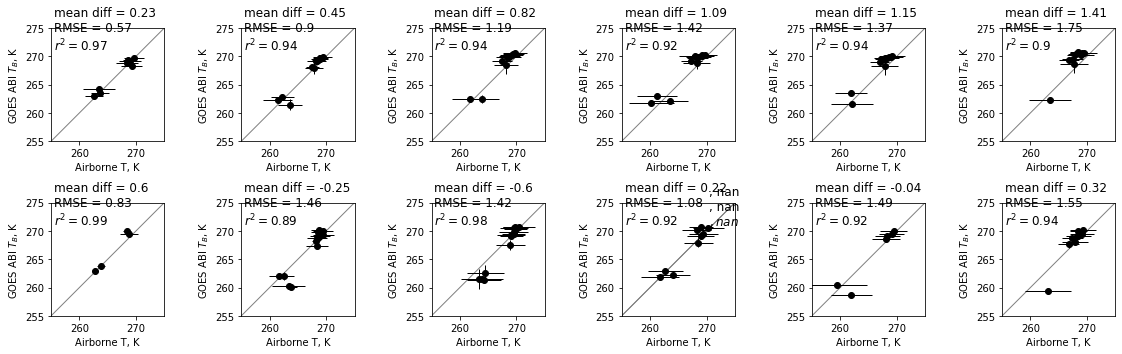

In [17]:
min_ax,max_ax = 255, 275
text_x, text_y = min_ax+0.5, max_ax-4

fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(16,5), tight_layout=True)

[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()

# GOES-16 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g16_rad, 'b14_tb_2km', pixelNW_airborneIR_g16_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelNW_airborneIR_g16_feb08.tb_mean_K.values, np.array(mean_values))

axNW16.plot(pixelNW_airborneIR_g16_feb08.tb_mean_K, mean_values, 'ok')
axNW16.errorbar(pixelNW_airborneIR_g16_feb08.tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axNW16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g16_rad, 'b14_tb_2km', pixelA_airborneIR_g16_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelA_airborneIR_g16_feb08.tb_mean_K.values, np.array(mean_values))

axA16.plot(pixelA_airborneIR_g16_feb08.tb_mean_K, mean_values, 'ok')
axA16.errorbar(pixelA_airborneIR_g16_feb08.tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axA16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g16_rad, 'b14_tb_2km', pixelB_airborneIR_g16_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelB_airborneIR_g16_feb08.tb_mean_K.values, np.array(mean_values))

axB16.plot(pixelB_airborneIR_g16_feb08.tb_mean_K, mean_values, 'ok')
axB16.errorbar(pixelB_airborneIR_g16_feb08.tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axB16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel C

mean_values, std_values = get_time_window_stats(pixelC_g16_rad, 'b14_tb_2km', pixelC_airborneIR_g16_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelC_airborneIR_g16_feb08.tb_mean_K.values, np.array(mean_values))

axC16.plot(pixelC_airborneIR_g16_feb08.tb_mean_K, mean_values, 'ok')
axC16.errorbar(pixelC_airborneIR_g16_feb08.tb_mean_K, mean_values, 
             xerr=pixelC_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axC16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g16_rad, 'b14_tb_2km', pixelD_airborneIR_g16_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelD_airborneIR_g16_feb08.tb_mean_K.values, np.array(mean_values))

axD16.plot(pixelD_airborneIR_g16_feb08.tb_mean_K, mean_values, 'ok')
axD16.errorbar(pixelD_airborneIR_g16_feb08.tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axD16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g16_rad, 'b14_tb_2km', pixelE_airborneIR_g16_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelE_airborneIR_g16_feb08.tb_mean_K.values, np.array(mean_values))

axE16.plot(pixelE_airborneIR_g16_feb08.tb_mean_K, mean_values, 'ok')
axE16.errorbar(pixelE_airborneIR_g16_feb08.tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axE16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

################


# GOES-17 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g17_rad, 'b14_tb_2km', pixelNW_airborneIR_g17_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelNW_airborneIR_g17_feb08.tb_mean_K.values, np.array(mean_values))

axNW17.plot(pixelNW_airborneIR_g17_feb08.tb_mean_K, mean_values, 'ok')
axNW17.errorbar(pixelNW_airborneIR_g17_feb08.tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axNW17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g17_rad, 'b14_tb_2km', pixelA_airborneIR_g17_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelA_airborneIR_g17_feb08.tb_mean_K.values, np.array(mean_values))

axA17.plot(pixelA_airborneIR_g17_feb08.tb_mean_K, mean_values, 'ok')
axA17.errorbar(pixelA_airborneIR_g17_feb08.tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axA17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g17_rad, 'b14_tb_2km', pixelB_airborneIR_g17_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelB_airborneIR_g17_feb08.tb_mean_K.values, np.array(mean_values))

axB17.plot(pixelB_airborneIR_g17_feb08.tb_mean_K, mean_values, 'ok')
axB17.errorbar(pixelB_airborneIR_g17_feb08.tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axB17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel C1

mean_values, std_values = get_time_window_stats(pixelC1_g17_rad, 'b14_tb_2km', pixelC1_airborneIR_g17_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelC1_airborneIR_g17_feb08.tb_mean_K.values, np.array(mean_values))

axC17.plot(pixelC1_airborneIR_g17_feb08.tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC1_airborneIR_g17_feb08.tb_mean_K, mean_values, 
             xerr=pixelC1_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axC17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel C2

mean_values, std_values = get_time_window_stats(pixelC2_g17_rad, 'b14_tb_2km', pixelC2_airborneIR_g17_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelC2_airborneIR_g17_feb08.tb_mean_K.values, np.array(mean_values))

axC17.plot(pixelC2_airborneIR_g17_feb08.tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC2_airborneIR_g17_feb08.tb_mean_K, mean_values, 
             xerr=pixelC2_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axC17.text(text_x+15, text_y, f', {s2}\n, {s3}\n$, {s1}$', fontsize=12)

# GOES-17 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g17_rad, 'b14_tb_2km', pixelD_airborneIR_g17_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelD_airborneIR_g17_feb08.tb_mean_K.values, np.array(mean_values))

axD17.plot(pixelD_airborneIR_g17_feb08.tb_mean_K, mean_values, 'ok')
axD17.errorbar(pixelD_airborneIR_g17_feb08.tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axD17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g17_rad, 'b14_tb_2km', pixelE_airborneIR_g17_feb08.index, plus_minus_minutes)
stats_dict = summary_stats(pixelE_airborneIR_g17_feb08.tb_mean_K.values, np.array(mean_values))

axE17.plot(pixelE_airborneIR_g17_feb08.tb_mean_K, mean_values, 'ok')
axE17.errorbar(pixelE_airborneIR_g17_feb08.tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axE17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)


# plot formatting
for this_ax in axs.ravel():
    this_ax.set_xlabel('Airborne T, K')
    this_ax.set_ylabel('GOES ABI $T_B$, K')
    this_ax.set_xlim(min_ax,max_ax)
    this_ax.set_ylim(min_ax,max_ax)
    this_ax.set_aspect(1)


C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:38: RuntimeWarning: All-NaN slice encountered
  'min_diff' : np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:39: RuntimeWarning: All-NaN slice encountered
  'max_diff' : np.nanmax( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:40: RuntimeWarning: All-NaN slice encountered
  'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:42: RuntimeWarning: Mean of empty slice
  'mean_diff' : np.nanmean( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:44: RuntimeWarning: Mean of empty slice
  'mean_squared_diff' : np.nanmean( diff**2 ),
C:\Users\steve\AppData\Local\Temp\ipykernel_28188\1795509104.py:45: RuntimeWarning: Mean of empty slice
  'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),


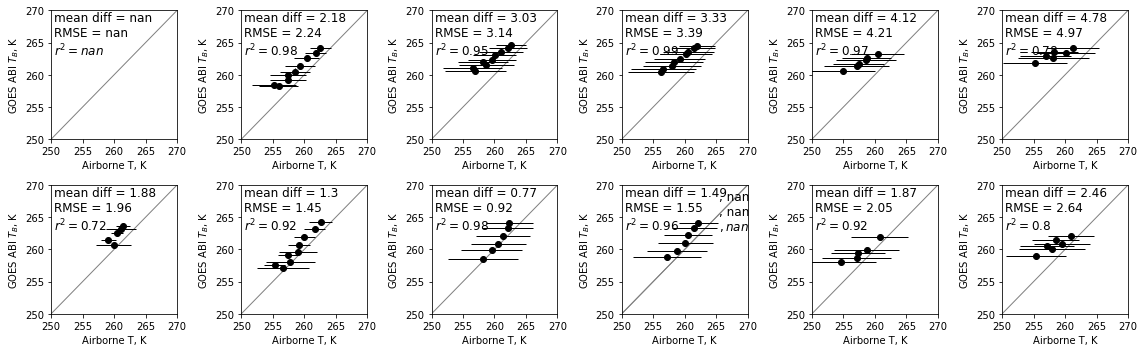

In [16]:
min_ax,max_ax = 250, 270
text_x, text_y = min_ax+0.5, max_ax-7

fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(16,5), tight_layout=True)

[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()

# GOES-16 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g16_rad, 'b14_tb_2km', pixelNW_airborneIR_g16_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelNW_airborneIR_g16_feb11.tb_mean_K.values, np.array(mean_values))

axNW16.plot(pixelNW_airborneIR_g16_feb11.tb_mean_K, mean_values, 'ok')
axNW16.errorbar(pixelNW_airborneIR_g16_feb11.tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axNW16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g16_rad, 'b14_tb_2km', pixelA_airborneIR_g16_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelA_airborneIR_g16_feb11.tb_mean_K.values, np.array(mean_values))

axA16.plot(pixelA_airborneIR_g16_feb11.tb_mean_K, mean_values, 'ok')
axA16.errorbar(pixelA_airborneIR_g16_feb11.tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axA16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g16_rad, 'b14_tb_2km', pixelB_airborneIR_g16_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelB_airborneIR_g16_feb11.tb_mean_K.values, np.array(mean_values))

axB16.plot(pixelB_airborneIR_g16_feb11.tb_mean_K, mean_values, 'ok')
axB16.errorbar(pixelB_airborneIR_g16_feb11.tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axB16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel C

mean_values, std_values = get_time_window_stats(pixelC_g16_rad, 'b14_tb_2km', pixelC_airborneIR_g16_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelC_airborneIR_g16_feb11.tb_mean_K.values, np.array(mean_values))

axC16.plot(pixelC_airborneIR_g16_feb11.tb_mean_K, mean_values, 'ok')
axC16.errorbar(pixelC_airborneIR_g16_feb11.tb_mean_K, mean_values, 
             xerr=pixelC_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axC16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g16_rad, 'b14_tb_2km', pixelD_airborneIR_g16_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelD_airborneIR_g16_feb11.tb_mean_K.values, np.array(mean_values))

axD16.plot(pixelD_airborneIR_g16_feb11.tb_mean_K, mean_values, 'ok')
axD16.errorbar(pixelD_airborneIR_g16_feb11.tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axD16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-16 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g16_rad, 'b14_tb_2km', pixelE_airborneIR_g16_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelE_airborneIR_g16_feb11.tb_mean_K.values, np.array(mean_values))

axE16.plot(pixelE_airborneIR_g16_feb11.tb_mean_K, mean_values, 'ok')
axE16.errorbar(pixelE_airborneIR_g16_feb11.tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axE16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

################


# GOES-17 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g17_rad, 'b14_tb_2km', pixelNW_airborneIR_g17_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelNW_airborneIR_g17_feb11.tb_mean_K.values, np.array(mean_values))

axNW17.plot(pixelNW_airborneIR_g17_feb11.tb_mean_K, mean_values, 'ok')
axNW17.errorbar(pixelNW_airborneIR_g17_feb11.tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axNW17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g17_rad, 'b14_tb_2km', pixelA_airborneIR_g17_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelA_airborneIR_g17_feb11.tb_mean_K.values, np.array(mean_values))

axA17.plot(pixelA_airborneIR_g17_feb11.tb_mean_K, mean_values, 'ok')
axA17.errorbar(pixelA_airborneIR_g17_feb11.tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axA17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g17_rad, 'b14_tb_2km', pixelB_airborneIR_g17_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelB_airborneIR_g17_feb11.tb_mean_K.values, np.array(mean_values))

axB17.plot(pixelB_airborneIR_g17_feb11.tb_mean_K, mean_values, 'ok')
axB17.errorbar(pixelB_airborneIR_g17_feb11.tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axB17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel C1

mean_values, std_values = get_time_window_stats(pixelC1_g17_rad, 'b14_tb_2km', pixelC1_airborneIR_g17_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelC1_airborneIR_g17_feb11.tb_mean_K.values, np.array(mean_values))

axC17.plot(pixelC1_airborneIR_g17_feb11.tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC1_airborneIR_g17_feb11.tb_mean_K, mean_values, 
             xerr=pixelC1_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axC17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel C2

mean_values, std_values = get_time_window_stats(pixelC2_g17_rad, 'b14_tb_2km', pixelC2_airborneIR_g17_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelC2_airborneIR_g17_feb11.tb_mean_K.values, np.array(mean_values))

axC17.plot(pixelC2_airborneIR_g17_feb11.tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC2_airborneIR_g17_feb11.tb_mean_K, mean_values, 
             xerr=pixelC2_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axC17.text(text_x+15, text_y, f', {s2}\n, {s3}\n$, {s1}$', fontsize=12)

# GOES-17 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g17_rad, 'b14_tb_2km', pixelD_airborneIR_g17_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelD_airborneIR_g17_feb11.tb_mean_K.values, np.array(mean_values))

axD17.plot(pixelD_airborneIR_g17_feb11.tb_mean_K, mean_values, 'ok')
axD17.errorbar(pixelD_airborneIR_g17_feb11.tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axD17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

# GOES-17 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g17_rad, 'b14_tb_2km', pixelE_airborneIR_g17_feb11.index, plus_minus_minutes)
stats_dict = summary_stats(pixelE_airborneIR_g17_feb11.tb_mean_K.values, np.array(mean_values))

axE17.plot(pixelE_airborneIR_g17_feb11.tb_mean_K, mean_values, 'ok')
axE17.errorbar(pixelE_airborneIR_g17_feb11.tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
axE17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)


# plot formatting
for this_ax in axs.ravel():
    this_ax.set_xlabel('Airborne T, K')
    this_ax.set_ylabel('GOES ABI $T_B$, K')
    this_ax.set_xlim(min_ax,max_ax)
    this_ax.set_ylim(min_ax,max_ax)
